In [12]:
pip install hmmlearn

     |████████████████████████████████| 117 kB 1.9 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [22]:
def markov(lang):
    " Language parameter can be A, B or C"
    matrix = pd.DataFrame(np.zeros((7,7)), index = ["A", "o", "e", "t", "p", "g", "k"], 
                                  columns = ["A", "o", "e", "t", "p", "g", "k"] )
    for j in range(1,30):
        file = "language-training-lang" + str(lang) +"-" + str(j)
        path = root + file
        text = open(path, "r").read()
        
            #current state is column, next state is row

        length = len(text)
        for i in range(length-1):
            cur = text[i]
            nex = text[i+1]
            matrix.loc[nex,cur] += 1
            
    for col in ["A", "o", "e", "t", "p", "g", "k"]:
        matrix[col] = np.round(matrix[col]/np.sum(matrix[col]), 2)
    return(matrix)

# Question 1
<p>Refer to Quang Tran's PCW</p>
The parameters $\Theta$ for the model includes: the distribution for the initial state $\pi$, the transition matrix Z, and the emission matrix B. According to Bishop, for the current params $\Theta^{old}$ we need to compute the following:

$$\gamma(z_{n})=p(z_n | X, \Theta^{old})$$
$$\eta(z_{n-1},z_n)=p(z_{n-1},z_n | X, \Theta^{old})$$

Then in the M step, the new set of parameters are updated as follows:

$$\pi_k=\frac{\gamma(z_{1k})}{\sum_{j=1}^{3}\gamma(z_{1j})}$$

$$A_{jk}=\frac{\sum_{n=2}^{1000}\eta(z_{n-1,j},z_{nk})}{\sum_{l=1}^{3}\sum_{n=2}^{1000}\eta(z_{n-1,j},z_{nl})}$$

$$B_{ik}=\frac{\sum_{n=1}^{1000}\gamma(z_{nk})x_{ni}}{\sum_{n=1}^{1000}\gamma(z_{nk})}$$

These together form $\Theta^{new}$

1. We see that we should avoid initializing everything to be equal, because for example, if we initialize $\pi$ to (1/3,1/3,1/3) then it keeps that value in each iteration. 

2. If any element of $\pi$ or A is 0 then that element remains 0 in all updates. Therefore, we avoide zero initialization.

# Question 2

In [10]:

import numpy as np
letter_list = ["A" ,"o", 'e', 't', 'p', 'g', 'k']
text = open(fname, 'r').read()
text_encoded = []
for letter in text:
    text_encoded.append(letter_list.index(letter))
X = np.array(X)
X

array([[2],
       [1],
       [5],
       [5],
       [2],
       [5],
       [5],
       [0],
       [2],
       [5],
       [5],
       [2],
       [4],
       [5],
       [4],
       [4],
       [4],
       [1],
       [4],
       [4],
       [1],
       [5],
       [1],
       [4],
       [4],
       [4],
       [5],
       [1],
       [4],
       [4],
       [1],
       [1],
       [4],
       [2],
       [5],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [3],
       [0],
       [3],
       [3],
       [3],
       [1],
       [1],
       [2],
       [4],
       [1],
       [1],
       [4],
       [4],
       [3],
       [2],
       [2],
       [2],
       [2],
       [1],
       [3],
       [4],
       [1],
       [4],
       [4],
       [4],
       [2],
       [2],
       [1],
       [2],
       [4],
       [1],
       [1],
       [1],
       [4],
       [1],
       [4],
       [5],
       [1],
       [1],
       [1],
       [2],
       [4],
    

In [40]:
# refer to https://hmmlearn.readthedocs.io/en/latest/tutorial.html
from hmmlearn import hmm
remodel = hmm.MultinomialHMM(n_components=3, n_iter=100)

remodel.fit(X);

In [43]:
remodel.emissionprob_
# remodel.transmat_
# remodel.emissionprob_
# np.sum(, axis=1)

array([[0.05536754, 0.07093851, 0.3987716 , 0.03441618, 0.05496671,
        0.334699  , 0.05084045],
       [0.073217  , 0.40640427, 0.03903628, 0.03856274, 0.3831099 ,
        0.03357071, 0.0260991 ],
       [0.4022733 , 0.04806741, 0.0208969 , 0.43621646, 0.02506975,
        0.02470732, 0.04276887]])

In [47]:
# the probabilities
prob_emission = remodel.predict_proba(X)
print(prob_Z2)

[[1.00000000e+00 4.57479404e-36 5.10772533e-55]
 [9.61076124e-01 3.41309555e-02 4.79292066e-03]
 [9.94724077e-01 4.23393088e-03 1.04199236e-03]
 ...
 [1.24554311e-01 8.68278272e-01 7.16741729e-03]
 [3.84562123e-02 9.58828952e-01 2.71483584e-03]
 [3.47370691e-02 9.56876312e-01 8.38661856e-03]]


# Question 3

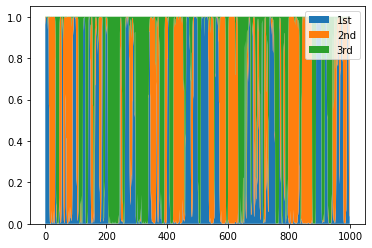

In [49]:
import numpy as np
import matplotlib.pyplot as plt

x = list(range(len(X)))
person1 = prob_emission[:,0]
person2 = prob_emission[:,1]
person3 = prob_emission[:,2]
# y = np.vstack([y1, y2, y3])
labels = ["1st", "2nd", "3rd"]

fig, ax = plt.subplots()
ax.stackplot(x, y1, y2, y3, labels=labels)
ax.legend()
# plt.show()
